In [4]:
dir <- '/gpfs/loomis/pi/zhao2/cs2629/SARC_BAL'
bulk.rawcount <- read.table(paste0(dir,"/rawcounts_matrix_corrected_BAL209_withAnnot.txt"),header=T)

In [7]:
library('biomaRt')
#ensembl = useMart("ensembl", dataset="hsapiens_gene_ensembl")
#gb <- getBM(attributes=c("affy_hg_u95av2","ensembl_transcript_id","gene_biotype","hgnc_symbol"),filters = c("biotype"), values=list('protein_coding'), mart=ensembl)

#protein_coding_gene <- rownames(seur)[protein_coding_idx]

mart <- useMart("ENSEMBL_MART_ENSEMBL")
mart <- useDataset("hsapiens_gene_ensembl", mart)
annotLookup <- getBM(
  mart=mart,
  attributes=c(
    "gene_biotype",
    "hgnc_symbol"),
  values = bulk.rawcount$GeneID, uniqueRows=TRUE)



In [12]:
annotLookup <- annotLookup[annotLookup$gene_biotype %in% c('protein_coding'),]

In [14]:
str(annotLookup)

'data.frame':	19373 obs. of  2 variables:
 $ gene_biotype: chr  "protein_coding" "protein_coding" "protein_coding" "protein_coding" ...
 $ hgnc_symbol : chr  "MT-ND1" "MT-ND2" "MT-CO1" "MT-CO2" ...


In [15]:
bulk.rawcount <- bulk.rawcount[bulk.rawcount$GeneID %in% annotLookup$hgnc_symbol,]

In [16]:
head(bulk.rawcount)

,GeneID,Chr,Start,End,Strand,Length,X01B9020_010,X01B9021_011,X01B9022_001,X01B9023_012,⋯,X09B9421_012,X09B9422_015,X09B9423_003,X09B9426_003,X09B9427_012,X09B9428_010,X09B9431_015,X09B9436_013,X09B9439_016,X10B9379_003
,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
14,OR4F5,chr1,69091,70008,+,918,0,2,0,0,⋯,1,1,0,0,0,0,0,1,0,0
17,OR4F29,chr1;chr1;chr5,450740;685716;181367287,451678;686654;181368225,-;-;+,2817,1,2,3,3,⋯,3,0,0,0,3,3,0,1,2,0
18,OR4F3,chr1;chr1;chr5,450740;685716;181367287,451678;686654;181368225,-;-;+,2817,1,2,3,3,⋯,3,0,0,0,3,3,0,1,2,0
19,OR4F16,chr1;chr1;chr5,450740;685716;181367287,451678;686654;181368225,-;-;+,2817,1,2,3,3,⋯,3,0,0,0,3,3,0,1,2,0
31,SAMD11,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1,925741;925922;930155;931039;935772;939040;939275;941144;942136;942410;942559;943253;943698;943908,925800;926013;930336;931089;935896;939129;939460;941306;942251;942488;943058;943377;943808;944581,+;+;+;+;+;+;+;+;+;+;+;+;+;+,2554,73,64,107,138,⋯,128,112,40,151,175,45,210,188,160,78
32,NOC2L,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1,944203;945057;945518;946173;946402;948131;948490;951127;952000;952412;953175;953782;954004;955923;956095;956894;957099;958929;959215,944800;945146;945653;946286;946545;948232;948603;951238;952139;952600;953288;953892;954082;956013;956215;957025;957273;959081;959299,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-,2800,702,1068,1514,1859,⋯,1162,599,622,1010,908,477,1529,1299,1050,978


In [17]:
truth <- readRDS(paste0(dir,"/celldiff.rds"))

In [19]:
match_table = read.csv("/gpfs/ysm/pi/zhao-data/wd262/sc_immune/sc_immune/Real_application/BAL/matchID.csv")
bulkIDs = colnames(bulk.rawcount)[-c(1:7)]
bulkIDs = substr(bulkIDs,2,8)
match_table2 <- match_table[match(bulkIDs,match_table$BAL.Kits),]

truth2 <- truth[match(match_table2$GRADS.ID,truth$GRADSID),]

In [57]:
bulk_clean <- bulk.rawcount[,-c(1:7)]
colnames(bulk_clean) <- truth2$GRADSID
saveRDS(bulk_clean, '/gpfs/ysm/pi/zhao-data/wd262/sc_immune/sc_immune/data/BAL/bulk.rawcount.rds'),

In [60]:
saveRDS(truth2,'/gpfs/ysm/pi/zhao-data/wd262/sc_immune/sc_immune/data/BAL/prop.truth.rds')

In [7]:
library(Seurat)
options(repr.plot.width=14, repr.plot.height=10)

In [61]:
## single cell
lung.sc <- readRDS('/gpfs/loomis/pi/zhao2/wd262/shared_data/HCL/seurat_object/integrate_seurat_obj/protein_coding_new_celltype/Adult-Lung_protein_coding_integrated_rmbatch.rds')

In [65]:
table(lung.sc$Celltype_used)


    Alveolar bipotent              AT1 cell              AT2 cell 
                  271                  1329                  4808 
               B cell Bronchial chondrocyte         Ciliated cell 
                  227                    29                    70 
           Clara cell               DELETED        Dendritic cell 
                  592                   436                  1086 
     Endothelial cell       Epithelial cell            Macrophage 
                 3667                   364                  5015 
            Mast cell         Megakaryocyte          Myeloid cell 
                  789                    16                   325 
  Natural killer cell            Neutrophil              NKT cell 
                 2037                  1131                   143 
           Plasmocyte    Proliferating cell  Proliferating T cell 
                  149                   188                    65 
   Smooth muscle cell          Stromal cell                T 

In [66]:
#lung.atlas <- readRDS('/gpfs/loomis/pi/zhao2/wd262/shared_data/LungAtlas/manuscriptVersion.Seuratv3.09222020.ProteinCoding.rds')

In [1]:
lung.bal <- readRDS('/gpfs/loomis/pi/zhao2/cs2629/SARC_BAL/BAL_SCTransform_embedded_05_14_19.rds')

In [75]:
table(lung.bal$celltype)


Alveolar_Macrophages             AM_CCL2+             AM_CCL4+ 
              114089                 2719                 2326 
       AM_Cell_cycle           AM_CXCL10+         AM_Ferritin+ 
                4610                 4060                 4423 
            AM_PPBP+             AM_SPP1+              B_cells 
                3530                 2928                  277 
                cDC2           Cell_cycle            DC_mature 
                 985                  110                  394 
   Dendritic_cells_C             Doublets     Epithelial_cells 
                1037                  434                  213 
          Mast_cells            Multiplet                   NK 
                1003                 1187                  436 
        Plasma_cells          T_cytotoxic             T_helper 
                 342                 4078                 7130 
        T_regulatory 
                 365 

In [4]:
lung.bal[["percent.mt"]] <- PercentageFeatureSet(lung.bal, pattern = "^MT-")

In [9]:
Idents(lung.bal) <- 'celltype'

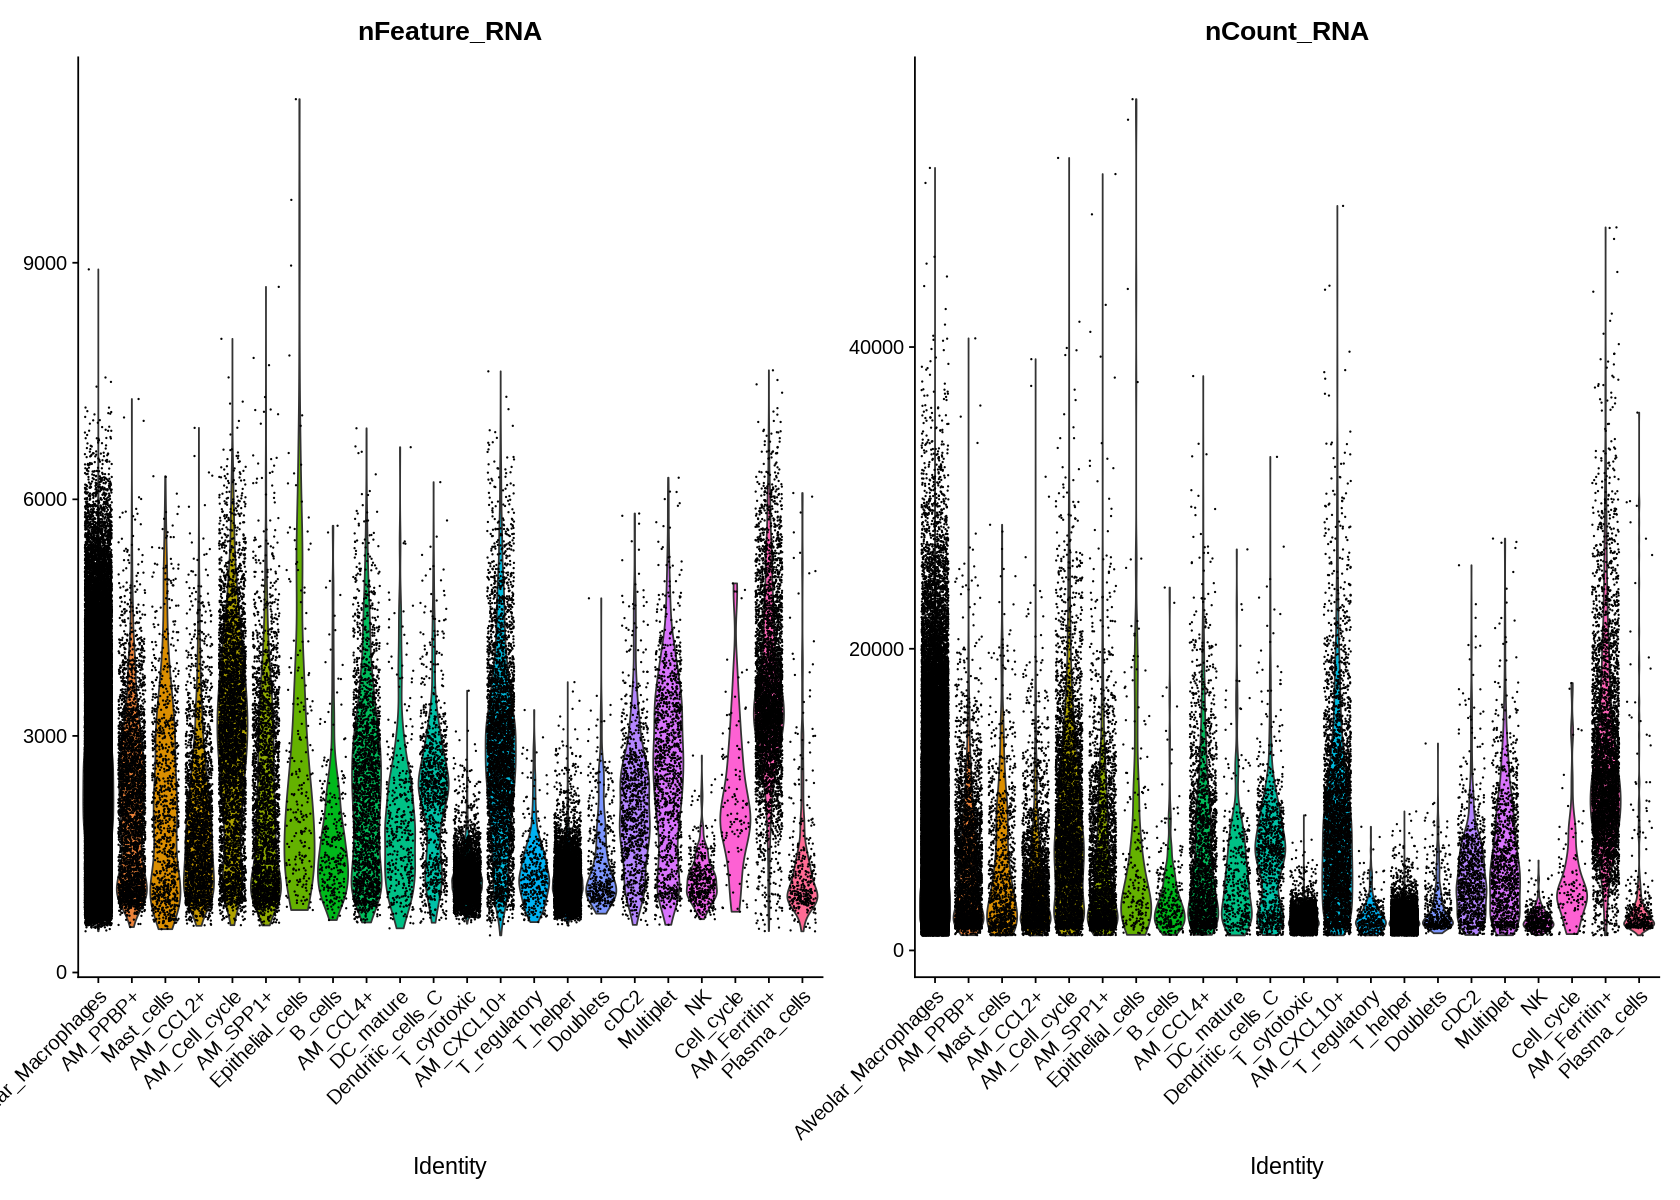

In [14]:
VlnPlot(lung.bal, features = c("nFeature_RNA", "nCount_RNA"), ncol = 2, pt.size =.01)

In [ ]:
## run transig
setwd("~/zhao-data/sc_immune/sc_immune/")
source('SAME/run_same.v2.R')
source('Batch_Correction/platform_batch_correction_combat.R')

In [1]:
file_tissue_list <-read.table('/gpfs/loomis/pi/zhao2/wd262/shared_data/bulk/E-MTAB-62/file_tissue_list.txt',header=T)
rownames(file_tissue_list) <- c(1:nrow(file_tissue_list))
file_tissue_list

,used_tissue,used_files
,<fct>,<fct>
1,Adult-Adipose,/gpfs/loomis/pi/zhao2/wd262/shared_data/HCL/seurat_object/integrate_seurat_obj/protein_coding_new_celltype/Adult-Adipose_protein_coding_integrated_rmbatch.rds
2,Adult-Adrenal-Gland,/gpfs/loomis/pi/zhao2/wd262/shared_data/HCL/seurat_object/integrate_seurat_obj/protein_coding_new_celltype/Adult-Adrenal-Gland_protein_coding_integrated_rmbatch.rds
3,Adult-Artery,/gpfs/loomis/pi/zhao2/wd262/shared_data/HCL/seurat_object/integrate_seurat_obj/protein_coding_new_celltype/Adult-Artery_protein_coding_integrated_rmbatch.rds
4,Adult-Bladder,/gpfs/loomis/pi/zhao2/wd262/shared_data/HCL/seurat_object/integrate_seurat_obj/protein_coding_new_celltype/Adult-Bladder_protein_coding_integrated_rmbatch.rds
5,Adult-Bone-Marrow,/gpfs/loomis/pi/zhao2/wd262/shared_data/HCL/seurat_object/integrate_seurat_obj/protein_coding_new_celltype/Adult-Bone-Marrow_protein_coding_integrated_rmbatch.rds
6,Adult-Cerebellum,/gpfs/loomis/pi/zhao2/wd262/shared_data/HCL/seurat_object/integrate_seurat_obj/protein_coding_new_celltype/Adult-Cerebellum_protein_coding_integrated_rmbatch.rds
7,Adult-Colon,/gpfs/loomis/pi/zhao2/wd262/shared_data/HCL/seurat_object/integrate_seurat_obj/protein_coding_new_celltype/Adult-Colon_protein_coding_integrated_rmbatch.rds
8,Adult-Esophagus,/gpfs/loomis/pi/zhao2/wd262/shared_data/HCL/seurat_object/integrate_seurat_obj/protein_coding_new_celltype/Adult-Esophagus_protein_coding_integrated_rmbatch.rds
9,Adult-Heart,/gpfs/loomis/pi/zhao2/wd262/shared_data/HCL/seurat_object/integrate_seurat_obj/protein_coding_new_celltype/Adult-Heart_protein_coding_integrated_rmbatch.rds


In [ ]:
target_tissue <- 'Lung'
used_idx <- 
files = file_tissue_list$used_files[idx]
tissue_list <- file_tissue_list$used_tissue[idx]
celltype_used_list <- c("B", "Neutrophil", "NK cell", "T")
YSG <- readRDS("/gpfs/ysm/pi/zhao-data/wd262/sc_immune/sc_immune/data/NSCLC/sg.list.rds")
output_path = "/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/pipeline_on_HCL"
mcmc_samples_theta1=5
Y0 <- read.table("data/NSCLC/Fig2b-WholeBlood_RNAseq.txt", row.names = 1, header = T, sep = "\t")